# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [1]:
# Your code here - load the dataset
import pandas as pd 

ames= pd.read_csv("ames.csv", index_col=0)


Visually inspect `ames` (it's ok if you can't see all of the columns).

In [2]:
# Your code here
ames.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [3]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [4]:
# Your code here - drop columns with missing data
ames= ames.dropna(axis=1)
ames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  YearBuilt      1460 non-null   int64 
 17  YearRemodAdd   1460 non-null   int64 
 18  RoofStyle      1460 non-null   ob

## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

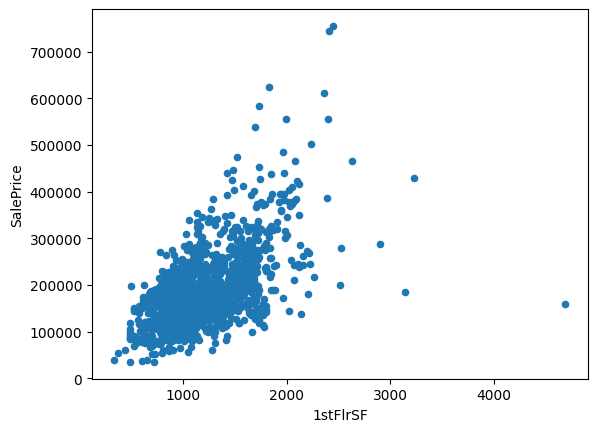

In [5]:
# Your code here - continuous numeric predictor

"""
1stFlrSF: First Floor square feet
"""
ames.plot.scatter(x="1stFlrSF", y="SalePrice")


### Discrete Numeric Predictor

<Axes: xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

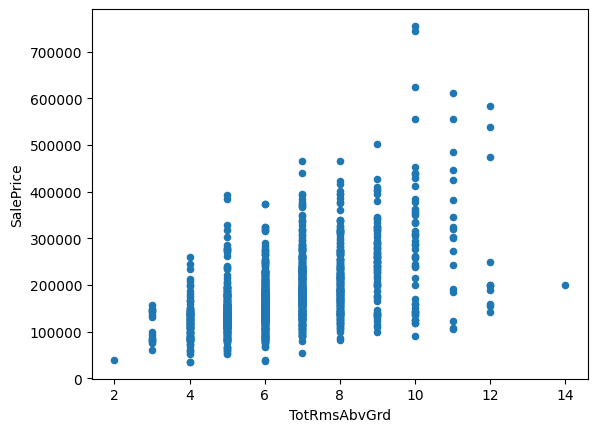

In [6]:
# Your code here - discrete numeric predictor
"""
Neighborhood: Physical locations within Ames city limits
"""

ames.plot.scatter(x="TotRmsAbvGrd", y="SalePrice")


### String Categorical Predictor

<Axes: xlabel='LotShape'>

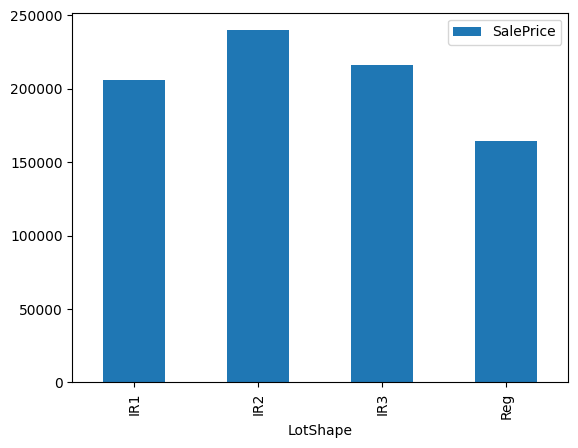

In [66]:
# Your code here - string categorical predictor
"""
LotShape: General shape of property
"""

ames.groupby('LotShape').mean('LotShape').plot.bar(y='SalePrice')


### Discrete Categorical Predictor

<Axes: xlabel='OverallQual'>

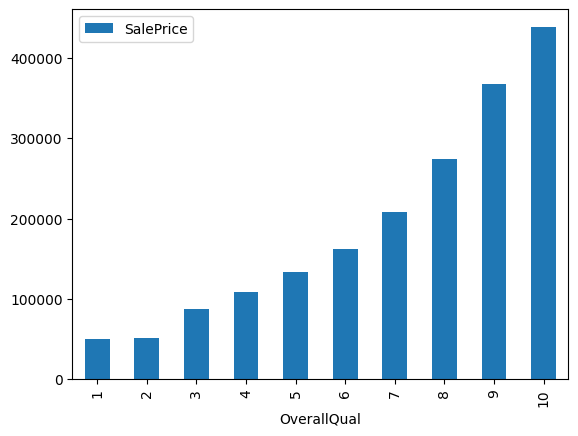

In [34]:
# Your code here - discrete categorical predictor
"""
MSSubClass: Identifies the type of dwelling involved in the sale.
"""

ames.groupby('OverallQual').mean('OverallQual').plot.bar(y='SalePrice')

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [67]:
# Your code here - prepare X and y, including one-hot encoding
y=ames['SalePrice']

X=ames[['1stFlrSF', 'LotShape', 'OverallQual']]

X= pd.get_dummies(X, columns=['LotShape'], drop_first=True, dtype=int)

X

,1stFlrSF,OverallQual,LotShape_IR2,LotShape_IR3,LotShape_Reg
Id,,,,,
1,856,7,0,0,1
2,1262,6,0,0,1
3,920,7,0,0,0
4,961,7,0,0,0
5,1145,8,0,0,0
...,...,...,...,...,...
1456,953,6,0,0,1
1457,2073,6,0,0,1
1458,1188,7,0,0,1


In [41]:
# Your answer here - which category or categories were dropped?
"""
  LotShape_IR1	Slightly irregular	 was dropped
"""

'\nNeighborhood_Blmngtn\tBloomington Heights, was dropped\n'

In [68]:
# Your code here - build a regression model and display results

import statsmodels.api as sm

model= sm.OLS(y, sm.add_constant(X))

results= model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     690.7
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:50:43   Log-Likelihood:                -17656.
No. Observations:                1460   AIC:                         3.532e+04
Df Residuals:                    1454   BIC:                         3.536e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.026e+05   5912.360    -17.354   

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

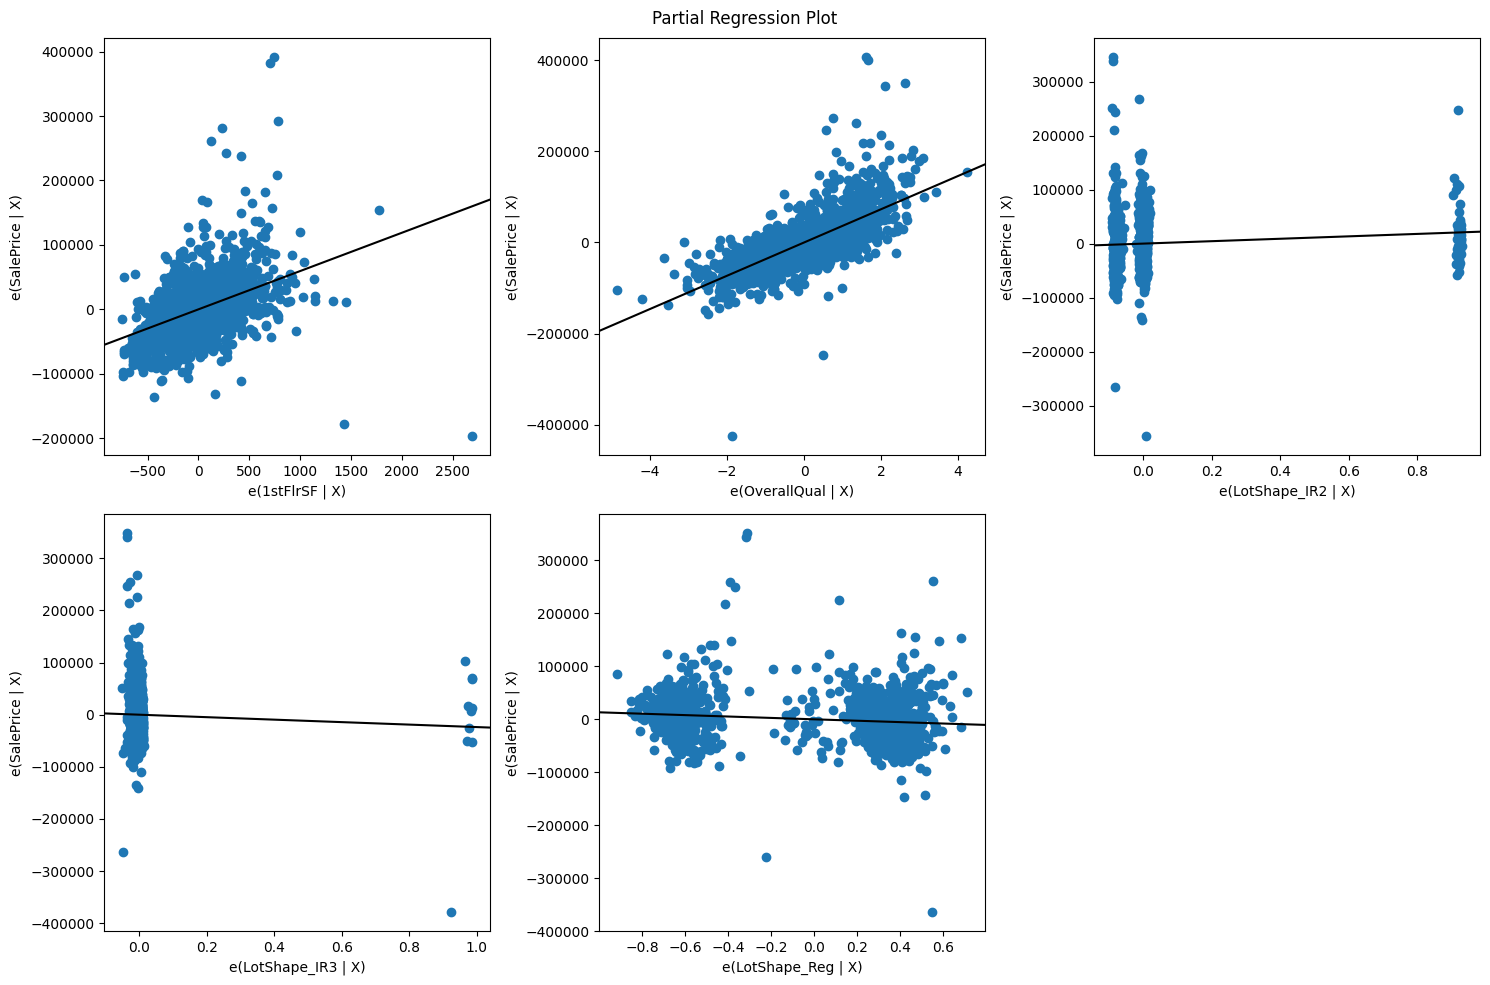

In [74]:
# Your code here - create partial regression plots
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(results, exog_idx=list(X.columns), grid=(2,3), fig=fig)
plt.tight_layout()
plt.show()

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [72]:
# Your code here - calculate an error-based metric

from sklearn.metrics import mean_absolute_error

y_pred = results.predict(sm.add_constant(X))
mean_absolute_error(y, y_pred)

29917.638861500083

## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [ ]:
# Your answer here
"""
This model is overallstatistically significant, and explains about 7% of the
variance in SalePrice. On average it is off by about $30k in its predictions
of home price.

At an alpha of, all of our coefficients are statistically significant, except
for LotShape_IR3, so we can say that:

const: When first floor square ft is 0, overall quality is 0, and lot shape
       is slightly irregular, we would expect a home sale price of -102k
       
1stFlrSF : For each increase of 1 sqft in first floor living area, we see an
           associated increase of about $59 in sale price

OverallQual: For each increase of 1 in overall quality, we see an associated
             increase of about $36k in sale price

LotShape_IR2: Compared to a slightly irregular lot shape, we see an associated
              increase of about $22k for a moderately irregular lot shape

LotShape_IR3: Compared to a slightly irregular lot shape, we see an associated
              decrease of about $24k for an irregular lot shape

LotShape_Reg: Compared to a slightly irregular lot shape, we see an associated
              decrease of about $13k for a regular lot shape

Looking at the partial regression plots, the dummy variables look fairly
different from the other variables. They tend to have two- three clusters 
rather than a continuous "cloud". Given the relatively small numbers in 
IR2 and IR3, I wonder if a better model would have these binned together 
with IR1 instead.
"""

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [75]:
# Your code here
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression


X_sklearn = ames[["1stFlrSF", "OverallQual", "LotShape"]].copy()
X_cat = X_sklearn[["LotShape"]]
X_numeric = X_sklearn.drop("LotShape", axis=1)

ohe = OneHotEncoder(drop="first", sparse_output=False)
ohe.fit(X_cat)
X_cat_ohe = pd.DataFrame(data=ohe.transform(X_cat),
    columns=[f"LotShape_{cat}" for cat in ohe.categories_[0][1:]],
    index=X_cat.index)
X_cat_ohe

,LotShape_IR2,LotShape_IR3,LotShape_Reg
Id,,,
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
...,...,...,...
1456,0.0,0.0,1.0
1457,0.0,0.0,1.0
1458,0.0,0.0,1.0


In [76]:
X_sklearn_final = pd.concat([X_numeric, X_cat_ohe], axis=1)
X_sklearn_final

,1stFlrSF,OverallQual,LotShape_IR2,LotShape_IR3,LotShape_Reg
Id,,,,,
1,856,7,0.0,0.0,1.0
2,1262,6,0.0,0.0,1.0
3,920,7,0.0,0.0,0.0
4,961,7,0.0,0.0,0.0
5,1145,8,0.0,0.0,0.0
...,...,...,...,...,...
1456,953,6,0.0,0.0,1.0
1457,2073,6,0.0,0.0,1.0
1458,1188,7,0.0,0.0,1.0


In [77]:
lr = LinearRegression()
lr.fit(X_sklearn_final, y)

LinearRegression()

In [78]:
import numpy as np
print(results.params.values)
print(np.append(lr.intercept_, lr.coef_))

[-1.02601701e+05  5.94435291e+01  3.64532014e+04  2.24527540e+04
 -2.37350023e+04 -1.32508851e+04]
[-1.02601701e+05  5.94435291e+01  3.64532014e+04  2.24527540e+04
 -2.37350023e+04 -1.32508851e+04]


## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.